In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import ast
import math
import os
import numpy as np

# Procesamiento necesario a realizar 1 vez, cada que se acutalicen los datos del tráfico disponibles

In [2]:
dir = "C:/Users/valer/Documents/CIC/doctorado/A24/Tesis/Datos para compartir en DRIVE/Informacion estaciones.csv"
info_estaciones = pd.read_csv(dir, encoding="Latin1")

#EMCAS = ["PED", "FAC", "BJU", "NEZ", "SAC"]
EMCAS = ["MGH", "SAC","MER", "FAC", "UIZ", "PED", "BJU", "AJM", "NEZ", "CUA"]
EMCAS_data = info_estaciones[info_estaciones["Key"].isin(EMCAS)]
EMCAS_data

,Key,Name,ID,O3,CO,SO2,NO2,PM10,PM25,Status,date,Alcaldía o municipio,State,Altitud (msnm),Latitude,Longitude,Domicilio,Página,Notas
2,AJM,Ajusco Medio,484090120609,3.0,2.0,4.0,3.0,3.0,4.0,Activa,12/04/2024,Tlalpan,CDMX,2619,19.272100,-99.207658,"Encinos # 41, col. Miguel Hidalgo 4ta sección,...",http://www.aire.cdmx.gob.mx/entornos/entorno_d...,NaN
4,BJU,Benito Juarez,484090140309,3.0,2.0,4.0,3.0,3.0,4.0,Activa,14/04/2024,Benito Juárez,CDMX,2250,19.371612,-99.158969,"Municipio libre y Uxmal, Col. Santa Cruz Atoya...",http://www.aire.cdmx.gob.mx/entornos/entorno_d...,NaN
10,CUA,Cuajimalpa,484090040109,4.0,2.0,3.0,3.0,3.0,NaN,Activa,20/04/2024,Cuajimalpa de Morelos,CDMX,2704,19.365313,-99.291705,"Monte Encino No. 14, Col. Jesús del Monte, C.P...",http://www.aire.cdmx.gob.mx/entornos/entorno_d...,NaN
15,FAC,FES Acatlán,484150570109,3.0,2.0,3.0,3.0,3.0,NaN,Activa,25/04/2024,Naucalpan de Juárez,Estado de México,2299,19.482473,-99.243524,"Av. Alcanfores y San Juan Totoltepec s/n, Col....",http://www.aire.cdmx.gob.mx/entornos/entorno_d...,NaN
26,MER,Merced,484090170127,3.0,2.0,3.0,3.0,3.0,3.0,Activa,06/05/2024,Venustiano Carranza,CDMX,2245,19.424610,-99.119594,"Congreso de la Unión esq. Stan de Tiro s/n, Co...",http://www.aire.cdmx.gob.mx/entornos/entorno_d...,NaN
27,MGH,Miguel Hidalgo,484090160609,3.0,2.0,3.0,3.0,3.0,3.0,Activa,07/05/2024,Miguel Hidalgo,CDMX,2366,19.404050,-99.202603,"Calle Sur 128 No. 53, Col. América, Miguel Hid...",http://www.aire.cdmx.gob.mx/entornos/entorno_d...,NaN
31,NEZ,Nezahualcóyotl,484150580115,3.0,2.0,3.0,3.0,NaN,3.0,Activa,11/05/2024,Nezahualcóyotl,Estado de México,2235,19.393734,-99.028212,"Av. Ángel de la Independencia s/n, Col. Metrop...",http://www.aire.cdmx.gob.mx/entornos/entorno_d...,NaN
32,PED,Pedregal,484090100127,4.0,2.0,4.0,3.0,3.0,3.0,Activa,12/05/2024,Álvaro Obregón,CDMX,2326,19.325146,-99.204136,"Cañada No. 370, Col. Jardines del Pedregal, C....",http://www.aire.cdmx.gob.mx/entornos/entorno_d...,NaN
36,SAC,Santiago Acahualtepec,484800090073,3.0,2.0,3.0,3.0,NaN,3.0,Activa,16/05/2024,Iztapalapa,CDMX,2293,19.345610,-99.009381,"Retama s/n esquina 5 de febrero, Col. 2a Ampli...",http://www.aire.cdmx.gob.mx/entornos/entorno_d...,NaN
40,UIZ,UAM Iztapalapa,484090070219,3.0,2.0,3.0,3.0,3.0,3.0,Activa,20/05/2024,Iztapalapa,CDMX,2221,19.360794,-99.073880,"San Rafael Atlixco No. 180, Col. Vicentina, C....",http://www.aire.cdmx.gob.mx/entornos/entorno_d...,NaN


In [10]:
# Genera un archivo json con todas las coordenadas de todas las estaciones de la forma {"[coordenadas] = ID"}
# Las coordenadas son de tipo string
# Guarda la coordenada como key para poder asignar un único id sin repetir coordenadas
"""
dir = "C:/Users/valer/Documents/CIC/doctorado/air_pollution_data/df_completo_31_mayo_24_25114034_rows.csv"
traffic_data = pd.read_csv(dir)
len(traffic_data)
streets_unique = set(traffic_data.coordinates)
# Crear un diccionario que asigne un número a cada calle única
streets_dicnionary = {string:i for i, string in enumerate(streets_unique)}
print(len(streets_dicnionary))
dirStreetsID = "C:/Users/valer/Documents/CIC/doctorado/air_pollution_data/streetsID.json"
with open(dirStreetsID, "w") as archivo:
    json.dump(streets_dicnionary, archivo)
#traffic_data["streetID"]  = None 
traffic_data.head()
"""

MemoryError: Unable to allocate 1.68 GiB for an array with shape (9, 25114034) and data type object

844204
207240
1056198
440427
740787
518426
1032900
311012
799630
731270

In [4]:
for stationName in EMCAS:
    traffic_station = traffic_data[traffic_data.station==stationName]

    print(len(traffic_station))

    traffic_station = traffic_station.reset_index()
    #del traffic_SAC["index"]
    name = "traffic_"+stationName+".csv"
    traffic_station.to_csv(name, index_label=False)


844204
207240
1056198
440427
740787
518426
1032900
311012
799630
731270


In [37]:
#Guarda un archivo csv con la información de cada estación
"""
traffic_PED = traffic_data[traffic_data.station=="PED"]
traffic_FAC = traffic_data[traffic_data.station=="FAC"]
traffic_BJU = traffic_data[traffic_data.station=="BJU"]
traffic_NEZ = traffic_data[traffic_data.station=="NEZ"]
traffic_SAC = traffic_data[traffic_data.station=="SAC"]

print(len(traffic_BJU))
print(len(traffic_FAC))
print(len(traffic_PED))
print(len(traffic_NEZ))
print(len(traffic_SAC))

traffic_SAC = traffic_SAC.reset_index()
#del traffic_SAC["index"]
traffic_SAC.to_csv("traffic_SAC.csv", index_label=False)

traffic_PED = traffic_PED.reset_index()
#del traffic_PED["index"]
traffic_PED.to_csv("traffic_PED.csv", index_label=False)

traffic_BJU = traffic_BJU.reset_index()
#del traffic_BJU["index"]
traffic_BJU.to_csv("traffic_BJU.csv", index_label=False)

traffic_NEZ = traffic_NEZ.reset_index()
#del traffic_NEZ["index"]
traffic_NEZ.to_csv("traffic_NEZ.csv", index_label=False)

traffic_FAC = traffic_FAC.reset_index()
#del traffic_FAC["index"]
traffic_FAC.to_csv("traffic_FAC.csv", index_label=False)
"""

1032900
440427
518426
799630
207240


In [18]:
# Guarda el ID de la calle, en el archivo con todos los datos del tráfico, por cada estacion
"""
dirStreetsID = "C:/Users/valer/Documents/CIC/doctorado/air_pollution_data/streetsID.json"
with open(dirStreetsID, 'r') as archivo:
    streets_dicnionary = json.load(archivo)

dir = "C:/Users/valer/Documents/CIC/doctorado/air_pollution_data/traffic_EMCAS/traffic_"
for station_name in EMCAS:
    dir_file = dir+station_name+".csv"
    traffic_data = pd.read_csv(dir_file)
    for fila in range(len(traffic_data)):
        coordinates = traffic_data.iloc[fila].coordinates
        streetID = streets_dicnionary[coordinates]
        traffic_data.at[fila, "streetID"] = streetID
    traffic_data.head()    
    traffic_data.to_csv(dir_file, index_label=False)
"""

C:\Users\valer\AppData\Local\Temp\ipykernel_13788\1810260267.py:10: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  traffic_data = pd.read_csv(dir_file)
C:\Users\valer\AppData\Local\Temp\ipykernel_13788\1810260267.py:10: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  traffic_data = pd.read_csv(dir_file)
C:\Users\valer\AppData\Local\Temp\ipykernel_13788\1810260267.py:10: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  traffic_data = pd.read_csv(dir_file)
C:\Users\valer\AppData\Local\Temp\ipykernel_13788\1810260267.py:10: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  traffic_data = pd.read_csv(dir_file)


In [19]:
# Guarda un archivo json con las calles únicas de cada estación, con el formato {"ID: [coordenadas]"}
# LAS Coordenadas son de tipo lista
#las coordenadas están en tipo lista, el ID de la calles es el ID general considerando las calles de todas las estaciones
#"""
dirStreetsID = "C:/Users/valer/Documents/CIC/doctorado/air_pollution_data/streetsID.json"
with open(dirStreetsID , 'r') as archivo:
    streetsID = json.load(archivo)
dir_street = "C:/Users/valer/Documents/CIC/doctorado/air_pollution_data/streets/streets_"
dir = "C:/Users/valer/Documents/CIC/doctorado/air_pollution_data/traffic_EMCAS/traffic_"
for station_name in EMCAS:
    dir_file = dir+station_name+".csv"
    traffic_data = pd.read_csv(dir_file)
    streets_unique = set(traffic_data.coordinates)
    # Crear un diccionario que asigne un número a cada calle única
    streets = {i:string for i, string in enumerate(streets_unique)}
    all_points = []
    new_dict = {}
    for row in range(len(streets)):
        coordinates = ast.literal_eval(streets[row])
        ID_street = streetsID[str(coordinates)]
        new_dict[ID_street] = coordinates
    streets_filename = dir_street+ station_name + ".json"
    with open(streets_filename , 'w') as archivo:
        json.dump(new_dict, archivo)
#"""

C:\Users\valer\AppData\Local\Temp\ipykernel_13788\2176812559.py:12: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  traffic_data = pd.read_csv(dir_file)
C:\Users\valer\AppData\Local\Temp\ipykernel_13788\2176812559.py:12: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  traffic_data = pd.read_csv(dir_file)
C:\Users\valer\AppData\Local\Temp\ipykernel_13788\2176812559.py:12: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  traffic_data = pd.read_csv(dir_file)
C:\Users\valer\AppData\Local\Temp\ipykernel_13788\2176812559.py:12: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  traffic_data = pd.read_csv(dir_file)


# Busqueda del promedio del tráfico por hora (falta por calle)

In [6]:
#Promedio DEL TRÁFICO por hora

# Crear un DataFrame de ejemplo
#df = pd.DataFrame({
#    'fecha': ['20-02-2024', '20-02-2024', '20-02-2024', '20-02-2024', '20-02-2024'],
#    'hora': ['18:00:00', '18:15:00', '18:30:00', '18:45:00', '19:00:00'],
#    'medicion': [10, 15, 20, 25, 30]
#})


# Convertir la columna 'fecha' y 'hora' a tipo datetime
traffic_data['datetime'] = pd.to_datetime(traffic_data['date'] + ' ' + traffic_data['time'])

# Redondear las fechas a la hora más cercana
traffic_data['hora_redondeada'] = traffic_data['datetime'].dt.round('H')

# Agrupar por la hora redondeada y calcular el promedio de cada grupo
#df_promedio = traffic_data.groupby('hora_redondeada')['traffic_level'].mean().reset_index()

df = traffic_data['streetID'] 
# Agrupar por la hora redondeada y calcular el promedio de las mediciones
df_promedio = traffic_data.groupby('hora_redondeada').agg({
    'traffic_level': 'mean',  # Tomar el primer valor del sensor en el grupo
    'station': 'first',  # Calcular el promedio de las mediciones
    'streetID': 'first'  # Tomar el primer valor de las unidades en el grupo
}).reset_index()




        hora_redondeada  traffic_level station  streetID
0   2024-02-26 14:00:00       0.901747     SAC   22803.0
1   2024-02-26 15:00:00       0.912382     SAC    3944.0
2   2024-02-26 16:00:00       0.914689     SAC    1622.0
3   2024-02-26 17:00:00       0.892000     SAC   17490.0
4   2024-02-26 18:00:00       0.937150     SAC   26507.0
..                  ...            ...     ...       ...
635 2024-03-24 22:00:00       0.961451     SAC    7128.0
636 2024-03-24 23:00:00       0.973125     SAC    7128.0
637 2024-03-25 00:00:00       0.994606     SAC    7128.0
638 2024-03-25 01:00:00       0.998606     SAC   24309.0
639 2024-03-25 02:00:00       1.000000     SAC    1906.0

[640 rows x 4 columns]


C:\Users\valer\AppData\Local\Temp\ipykernel_20580\3287541082.py:9: UserWarning: Parsing dates in %d-%m-%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  traffic_data['datetime'] = pd.to_datetime(traffic_data['date'] + ' ' + traffic_data['time'])


In [11]:
for i in range(len(df_promedio)):
    print(df_promedio.iloc[i]["hora_redondeada"], df_promedio.iloc[i]["streetID"])

2024-02-26 14:00:00 22803.0
2024-02-26 15:00:00 3944.0
2024-02-26 16:00:00 1622.0
2024-02-26 17:00:00 17490.0
2024-02-26 18:00:00 26507.0
2024-02-26 19:00:00 502.0
2024-02-26 20:00:00 18362.0
2024-02-26 21:00:00 22986.0
2024-02-26 22:00:00 24309.0
2024-02-26 23:00:00 24309.0
2024-02-27 13:00:00 15739.0
2024-02-27 14:00:00 14320.0
2024-02-27 15:00:00 22803.0
2024-02-27 16:00:00 26912.0
2024-02-27 17:00:00 17653.0
2024-02-27 18:00:00 28526.0
2024-02-27 19:00:00 3944.0
2024-02-27 20:00:00 26507.0
2024-02-27 21:00:00 26507.0
2024-02-27 22:00:00 24309.0
2024-02-27 23:00:00 4819.0
2024-02-28 00:00:00 1906.0
2024-02-28 01:00:00 1906.0
2024-02-28 02:00:00 1906.0
2024-02-28 03:00:00 1906.0
2024-02-28 04:00:00 1906.0
2024-02-28 05:00:00 1906.0
2024-02-28 06:00:00 18362.0
2024-02-28 07:00:00 13085.0
2024-02-28 08:00:00 28526.0
2024-02-28 09:00:00 26507.0
2024-02-28 10:00:00 3944.0
2024-02-28 11:00:00 15739.0
2024-02-28 12:00:00 24309.0
2024-02-28 13:00:00 15739.0
2024-02-28 14:00:00 28526.0
2024-

In [ ]:
traffic_data['datetime'] = pd.to_datetime(traffic_data['date'] + ' ' + traffic_data['time'])

# Graficas de las calles que se solicitan en cada una de las 5 estaciones

In [ ]:
"""
all_points.to_list()
plt.figure()

limites = [0, 0.15, 0.35, 0.75, float('inf')]
colores = ['#777777', '#FF2323', '#FFFF37', '#2BC82B']

for i in range(len(all_points)):
    for j in range(len(all_points[i])):
        #if all_points[i][j]["date"]=='27-02-2024' and all_points[i][j]["time"]=="13:31:09":
        latitudes, longitudes = zip(*all_points[i][j]["coordinates"])
        velocidades = all_points[i][j]["properties"][0]["traffic_level"]
        # Mapear las velocidades a los índices de colores
        indices_colores = np.digitize(velocidades, bins=limites, right=True)
        # Graficar las coordenadas en la misma figura
        plt.plot(latitudes, longitudes, color=colores[indices_colores-1], marker='o', linestyle='-')


# Personalizar la apariencia del gráfico
plt.title('Ubicación de Coordenadas en la Calle')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)
plt.show()
"""

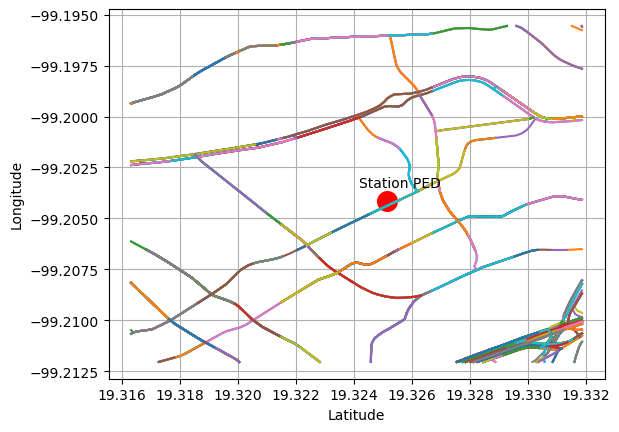

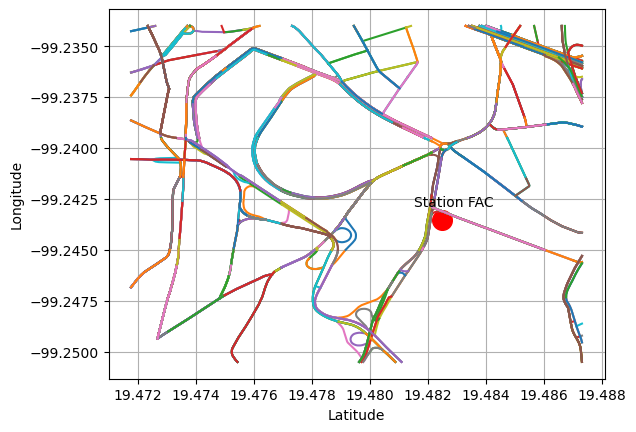

C:\Users\valer\AppData\Local\Temp\ipykernel_1524\3958122795.py:4: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  traffic_data = pd.read_csv(dir_file)


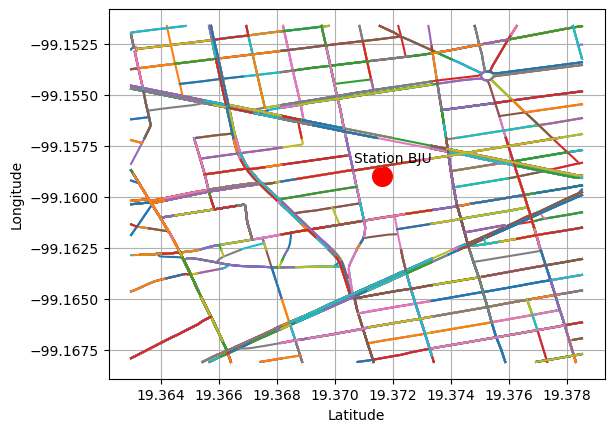

C:\Users\valer\AppData\Local\Temp\ipykernel_1524\3958122795.py:4: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  traffic_data = pd.read_csv(dir_file)


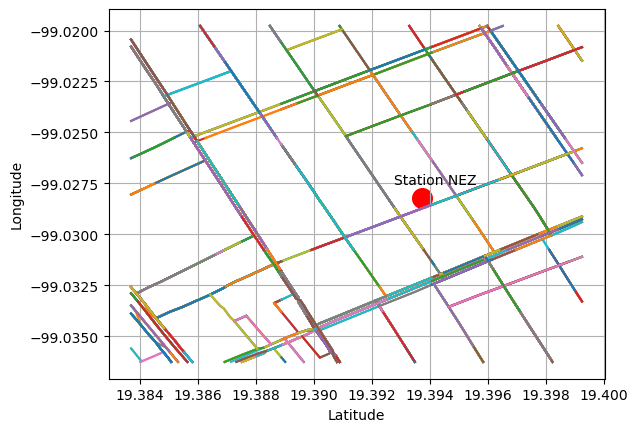

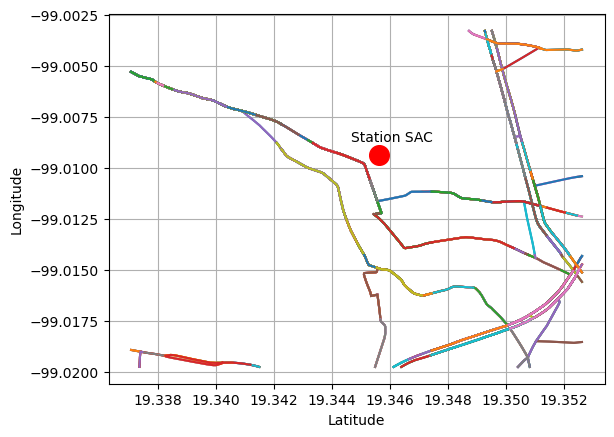

In [4]:
dir = "C:/Users/valer/Documents/CIC/doctorado/air_pollution_data/traffic_EMCAS/traffic_"
for station_name in EMCAS:
    dir_file = dir+station_name+".csv"
    traffic_data = pd.read_csv(dir_file)
    streets_unique = set(traffic_data.coordinates)
    # Crear un diccionario que asigne un número a cada calle única
    streets = {i:string for i, string in enumerate(streets_unique)}
    all_points = []
    for row in range(len(streets)):
        coordinates = ast.literal_eval(streets[row])
        all_points.append(coordinates)


    plt.figure()
    for coords in all_points:
        x = [punto[0] for punto in coords]
        y = [punto[1] for punto in coords]
        plt.plot(x, y)
    station_latitude = EMCAS_data[EMCAS_data["Key"]==station_name].Latitude.values[0]
    station_longitude = EMCAS_data[EMCAS_data["Key"]==station_name].Longitude.values[0]
    plt.scatter([station_latitude], [station_longitude], color='red', marker='o', s=200, label='SAC')
    name = "Station "+ station_name
    plt.annotate(name, (station_latitude, station_longitude), xytext=(-20, 10), textcoords='offset points', color='black')
    plt.grid(True)
    plt.xlabel('Latitude')
    plt.ylabel('Longitude')
    plt.show()


# Voy a encontrar los IDs de las calles de interés

1. Las s calles más cercanas, s = 10
2. La calle más grande

In [2]:
dir = "C:/Users/valer/Documents/CIC/doctorado/A24/Tesis/Datos para compartir en DRIVE/Informacion estaciones.csv"
info_estaciones = pd.read_csv(dir, encoding="Latin1")

#EMCAS = ["PED", "FAC", "BJU", "NEZ", "SAC"]
EMCAS = ["MGH", "SAC","MER", "FAC", "UIZ", "PED", "BJU", "AJM", "NEZ", "CUA"]

EMCAS_data = info_estaciones[info_estaciones["Key"].isin(EMCAS)]
EMCAS_data

,Key,Name,ID,O3,CO,SO2,NO2,PM10,PM25,Status,date,Alcaldía o municipio,State,Altitud (msnm),Latitude,Longitude,Domicilio,Página,Notas
2,AJM,Ajusco Medio,484090120609,3.0,2.0,4.0,3.0,3.0,4.0,Activa,12/04/2024,Tlalpan,CDMX,2619,19.272100,-99.207658,"Encinos # 41, col. Miguel Hidalgo 4ta sección,...",http://www.aire.cdmx.gob.mx/entornos/entorno_d...,NaN
4,BJU,Benito Juarez,484090140309,3.0,2.0,4.0,3.0,3.0,4.0,Activa,14/04/2024,Benito Juárez,CDMX,2250,19.371612,-99.158969,"Municipio libre y Uxmal, Col. Santa Cruz Atoya...",http://www.aire.cdmx.gob.mx/entornos/entorno_d...,NaN
10,CUA,Cuajimalpa,484090040109,4.0,2.0,3.0,3.0,3.0,NaN,Activa,20/04/2024,Cuajimalpa de Morelos,CDMX,2704,19.365313,-99.291705,"Monte Encino No. 14, Col. Jesús del Monte, C.P...",http://www.aire.cdmx.gob.mx/entornos/entorno_d...,NaN
15,FAC,FES Acatlán,484150570109,3.0,2.0,3.0,3.0,3.0,NaN,Activa,25/04/2024,Naucalpan de Juárez,Estado de México,2299,19.482473,-99.243524,"Av. Alcanfores y San Juan Totoltepec s/n, Col....",http://www.aire.cdmx.gob.mx/entornos/entorno_d...,NaN
26,MER,Merced,484090170127,3.0,2.0,3.0,3.0,3.0,3.0,Activa,06/05/2024,Venustiano Carranza,CDMX,2245,19.424610,-99.119594,"Congreso de la Unión esq. Stan de Tiro s/n, Co...",http://www.aire.cdmx.gob.mx/entornos/entorno_d...,NaN
27,MGH,Miguel Hidalgo,484090160609,3.0,2.0,3.0,3.0,3.0,3.0,Activa,07/05/2024,Miguel Hidalgo,CDMX,2366,19.404050,-99.202603,"Calle Sur 128 No. 53, Col. América, Miguel Hid...",http://www.aire.cdmx.gob.mx/entornos/entorno_d...,NaN
31,NEZ,Nezahualcóyotl,484150580115,3.0,2.0,3.0,3.0,NaN,3.0,Activa,11/05/2024,Nezahualcóyotl,Estado de México,2235,19.393734,-99.028212,"Av. Ángel de la Independencia s/n, Col. Metrop...",http://www.aire.cdmx.gob.mx/entornos/entorno_d...,NaN
32,PED,Pedregal,484090100127,4.0,2.0,4.0,3.0,3.0,3.0,Activa,12/05/2024,Álvaro Obregón,CDMX,2326,19.325146,-99.204136,"Cañada No. 370, Col. Jardines del Pedregal, C....",http://www.aire.cdmx.gob.mx/entornos/entorno_d...,NaN
36,SAC,Santiago Acahualtepec,484800090073,3.0,2.0,3.0,3.0,NaN,3.0,Activa,16/05/2024,Iztapalapa,CDMX,2293,19.345610,-99.009381,"Retama s/n esquina 5 de febrero, Col. 2a Ampli...",http://www.aire.cdmx.gob.mx/entornos/entorno_d...,NaN
40,UIZ,UAM Iztapalapa,484090070219,3.0,2.0,3.0,3.0,3.0,3.0,Activa,20/05/2024,Iztapalapa,CDMX,2221,19.360794,-99.073880,"San Rafael Atlixco No. 180, Col. Vicentina, C....",http://www.aire.cdmx.gob.mx/entornos/entorno_d...,NaN


# Primero solo obtenemos la información de la calle más cercana

In [75]:
station_name = "FAC"
station_latitude = EMCAS_data[EMCAS_data["Key"]==station_name].Latitude.values[0]
station_longitude = EMCAS_data[EMCAS_data["Key"]==station_name].Longitude.values[0]
print(station_latitude, station_longitude)

dir_file = "C:/Users/valer/Documents/CIC/doctorado/air_pollution_data/streets/streets_"
dir_file = dir_file + station_name + ".json"
with open(dir_file, "r") as j:
    streets = json.load(j)

diff_streets = []
dict_min = {}
for streetID in streets.keys():
    coordinates = streets[streetID]
    diff_points = []
    for coordinate in coordinates:
        diff_points.append(math.sqrt((station_latitude- coordinate[0])**2 + (station_longitude- coordinate[1])**2))
    nearest_point = min(diff_points)
    fearthest_point = max(diff_points)
    total_distance = fearthest_point +nearest_point
    dict_min[streetID] = total_distance

sort_distance_streets = sorted(dict_min.items(), key=lambda x: x[1])
print(sort_distance_streets)

s = 1
nearest_streets = sort_distance_streets[0:s]
all_points = []
for street in nearest_streets:
    streetID = street[0]
    coordinates = streets[streetID]
    all_points.append(coordinates)
print(len(all_points), streetID)




19.482473 -99.243524
[('4108', 0.0008593336820689817), ('26906', 0.0008920179778496228), ('6895', 0.00112650065603213), ('14274', 0.0011391209285498795), ('25642', 0.0011449005548299866), ('10187', 0.0013851576536213022), ('28251', 0.0014360364456156795), ('20838', 0.0014944356330600234), ('12336', 0.001618253565705443), ('2327', 0.0017403648025664919), ('24328', 0.0017598382842286338), ('18010', 0.0018285341412820374), ('25238', 0.001973052644154428), ('18697', 0.0020169211143821345), ('12016', 0.0020169211143821345), ('1358', 0.0020373683304550343), ('29196', 0.0020373683304550343), ('21833', 0.0020373683304550343), ('10011', 0.002096379295120531), ('25847', 0.002160276011012539), ('19900', 0.002179749492674681), ('23710', 0.002179749492674681), ('5291', 0.0023668140285072374), ('15865', 0.0023725936547873447), ('22610', 0.002639266376955944), ('4700', 0.0027593849703197075), ('1510', 0.0030317640726223016), ('15276', 0.0031640768379394904), ('22471', 0.0035224151743966326), ('782', 

MGH 19.40405 -99.202603


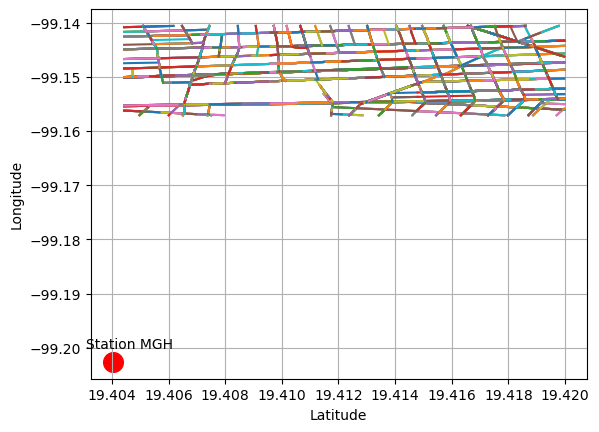

SAC 19.34561 -99.009381


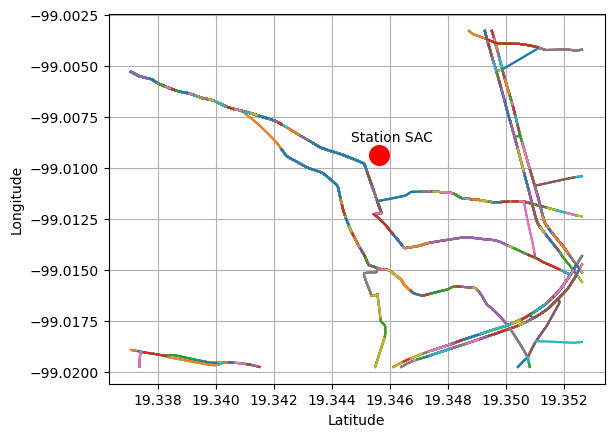

MER 19.42461 -99.119594


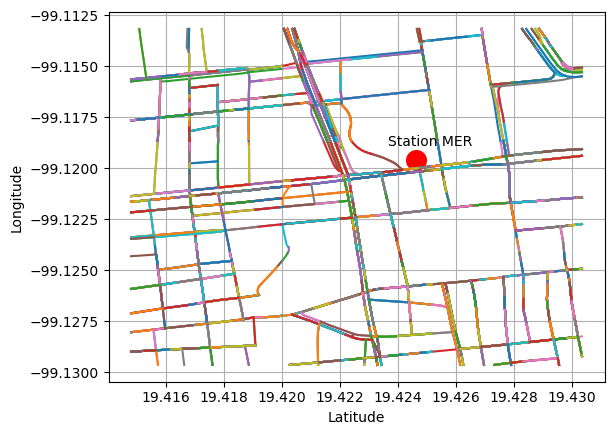

FAC 19.482473 -99.243524


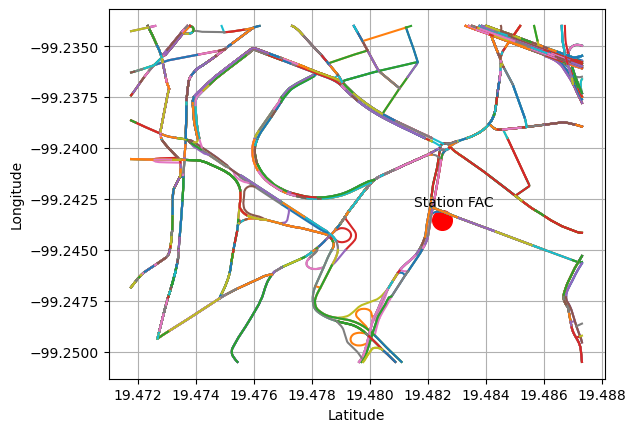

UIZ 19.360794 -99.07388


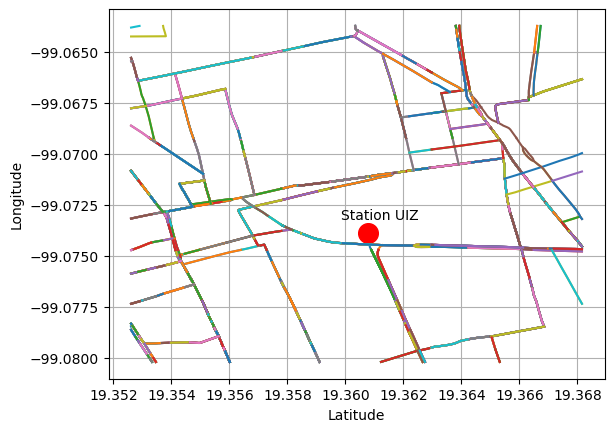

PED 19.325146 -99.204136


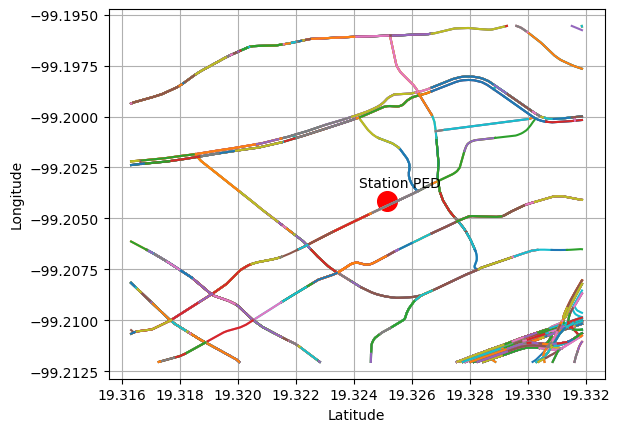

BJU 19.371612 -99.158969


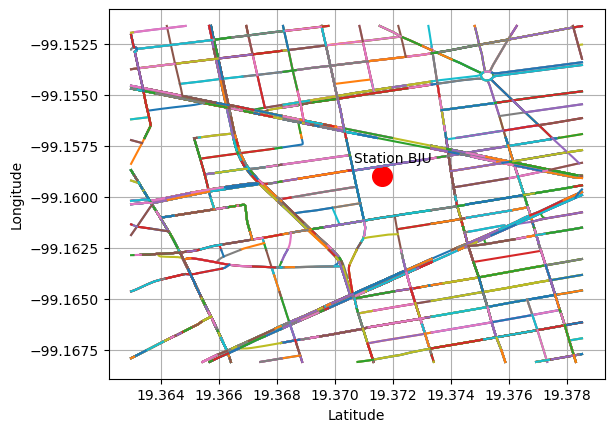

AJM 19.2721 -99.207658


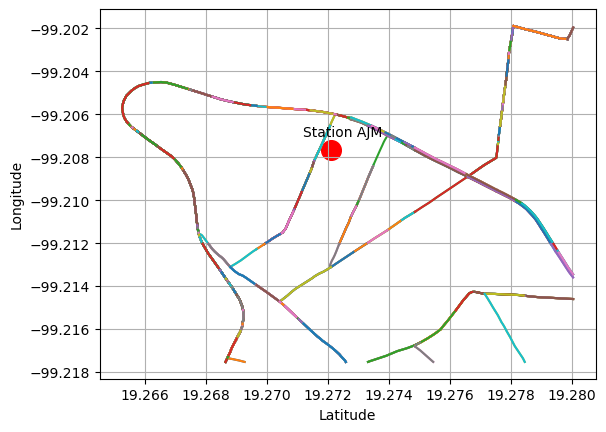

NEZ 19.393734 -99.028212


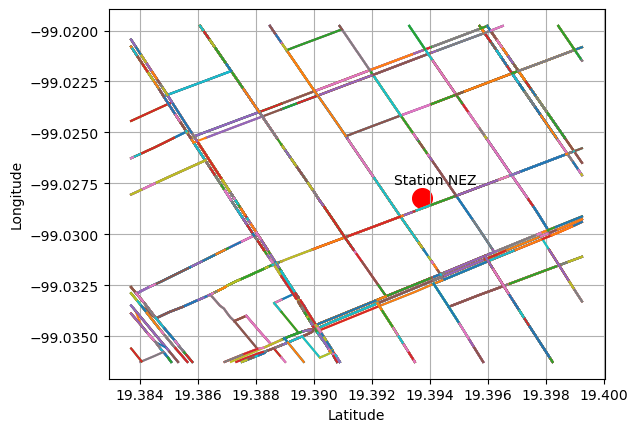

CUA 19.365313 -99.291705


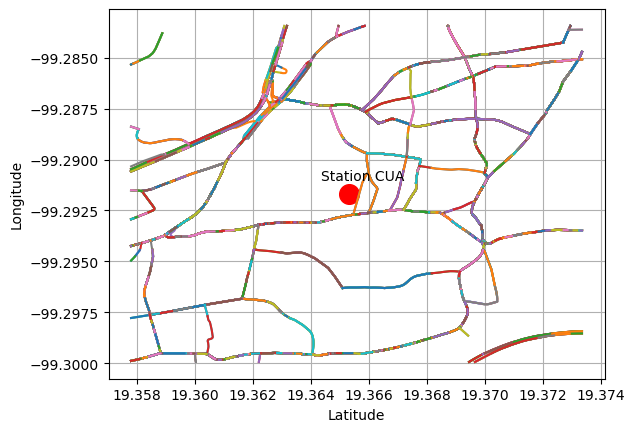

In [69]:
dict_nearest_streets = {}
for station_name in EMCAS:
    station_latitude = EMCAS_data[EMCAS_data["Key"]==station_name].Latitude.values[0]
    station_longitude = EMCAS_data[EMCAS_data["Key"]==station_name].Longitude.values[0]
    print(station_name, station_latitude, station_longitude)

    dir_file = "C:/Users/valer/Documents/CIC/doctorado/air_pollution_data/streets/streets_"
    dir_file = dir_file + station_name + ".json"
    with open(dir_file, "r") as j:
        streets = json.load(j)

    diff_streets = []
    dict_min = {}
    for streetID in streets.keys():
        coordinates = streets[streetID]
        diff_points = []
        for coordinate in coordinates:
            diff_points.append(math.sqrt((station_latitude- coordinate[0])**2 + (station_longitude- coordinate[1])**2))
        nearest_point = min(diff_points)
        fearthest_point = max(diff_points)
        total_distance = fearthest_point +nearest_point
        dict_min[streetID] = total_distance

    sort_distance_streets = sorted(dict_min.items(), key=lambda x: x[1])

    s = 5000
    nearest_streets = sort_distance_streets[0:s]
    all_streets = []
    all_points = []
    for street in nearest_streets:
        streetID = street[0]
        all_streets.append(streetID)
        all_points.append(streets[streetID])

    dict_nearest_streets[station_name] = all_streets
    #"""
    plt.figure()
    for coords in all_points:
        x = [punto[0] for punto in coords]
        y = [punto[1] for punto in coords]
        plt.plot(x, y)
    plt.scatter([station_latitude], [station_longitude], color='red', marker='o', s=200, label=station_name)
    name = "Station "+ station_name
    plt.annotate(name, (station_latitude, station_longitude), xytext=(-20, 10), textcoords='offset points', color='black')
    plt.grid(True)
    #plt.ylim(-99.246, -99.242)
    #plt.xlim(19.480, 19.488) # Límites para el eje x
    plt.xlabel('Latitude')
    plt.ylabel('Longitude')
    plt.show()
    #"""

dir_dict_nearest_streets = "C:/Users/valer/Documents/CIC/doctorado/air_pollution_data/dict_nearest_streets.json"
with open(dir_dict_nearest_streets, "w") as j:
    json.dump(dict_nearest_streets, j)

In [127]:
def calcular_longitud_calle(puntos):
    longitud_total = 0.0
    for i in range(len(puntos) - 1):
        x1, y1 = puntos[i]
        x2, y2 = puntos[i + 1]
        distancia = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
        longitud_total += distancia
    return longitud_total

PED La clave con el valor maximo es: 3371
FAC La clave con el valor maximo es: 24575
BJU La clave con el valor maximo es: 12899
NEZ La clave con el valor maximo es: 18765
SAC La clave con el valor maximo es: 27019


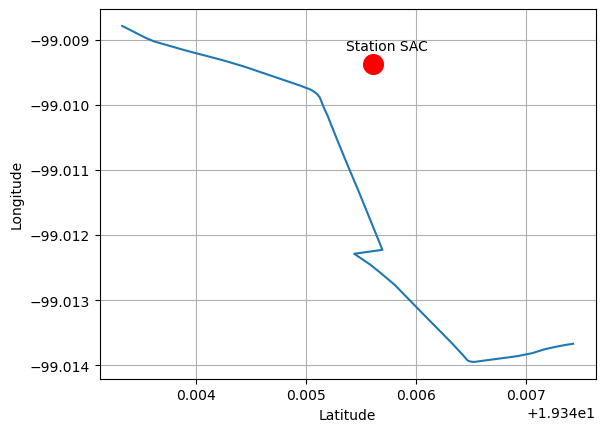

In [172]:
dict_biggest_streets = {}
for station_name in EMCAS:

    dir_file = "C:/Users/valer/Documents/CIC/doctorado/air_pollution_data/streets/streets_"
    dir_file = dir_file + station_name + ".json"
    with open(dir_file, "r") as j:
        streets = json.load(j)

    dict_list = {}
    for streetID in streets.keys():
        coordinates = streets[streetID]
        longitud = calcular_longitud_calle(coordinates)
        dict_list[streetID] = longitud

    clave_maxima, valor_maximo = max(dict_list.items(), key=lambda x: x[1])
    print(station_name, "La clave con el valor maximo es:", clave_maxima)

    dict_biggest_streets[station_name] = streets[clave_maxima]
#"""
plt.figure()
for coords in [streets[clave_maxima]]:
    x = [punto[0] for punto in coords]
    y = [punto[1] for punto in coords]
    plt.plot(x, y)
station_latitude = EMCAS_data[EMCAS_data["Key"]==station_name].Latitude.values[0]
station_longitude = EMCAS_data[EMCAS_data["Key"]==station_name].Longitude.values[0]
plt.scatter([station_latitude], [station_longitude], color='red', marker='o', s=200, label='SAC')
name = "Station "+ station_name
plt.annotate(name, (station_latitude, station_longitude), xytext=(-20, 10), textcoords='offset points', color='black')
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()
#"""


dir_dict_biggest_streets = "C:/Users/valer/Documents/CIC/doctorado/air_pollution_data/dict_biggest_streets.json"
with open(dir_dict_biggest_streets, "w") as j:
    json.dump(dict_biggest_streets, j)

# El siguiente paso es promediar los valores de la velocidad por hora, en cada calle de interés

In [192]:

dir_dict_biggest_streets = "C:/Users/valer/Documents/CIC/doctorado/air_pollution_data/dict_biggest_streets.json"
with open(dir_dict_biggest_streets, "r") as j:
    dict_biggest_streets = json.load(j)

    
dir_dict_nearest_streets = "C:/Users/valer/Documents/CIC/doctorado/air_pollution_data/dict_nearest_streets.json"
with open(dir_dict_nearest_streets, "r") as j:
    dir_dict_nearest_streets = json.load(j)

In [204]:
station_name = EMCAS[3]
nearest_street = dir_dict_nearest_streets[station_name][0]
print(nearest_street)
dir = "C:/Users/valer/Documents/CIC/doctorado/air_pollution_data/traffic_EMCAS/traffic_"
dir_file = dir+station_name+".csv"
traffic_data = pd.read_csv(dir_file)
traffic_data = traffic_data.drop(columns=["index"])
# Voy a extraer toda la info solo de la calle más cercana a la estación
streetID = dir_dict_nearest_streets[station_name][0]
traffic_dataCloserStreet = traffic_data[traffic_data.streetID==int(streetID)]
traffic_dataCloserStreet.head()

4108


,type,road_type,traffic_level,traffic_road_coverage,road_closure,road_category,road_subcategory,left_hand_traffic,coordinates,date,time,station,streetID
29,LINESTRING,NaN,1.000,full,NaN,street,local,NaN,"[[19.48249685665199, -99.24310147762299], [19....",26-02-2024,13:34:39,FAC,4108.0
267,LINESTRING,NaN,1.000,full,NaN,street,local,NaN,"[[19.48249685665199, -99.24310147762299], [19....",26-02-2024,13:39:38,FAC,4108.0
515,LINESTRING,NaN,1.000,full,NaN,street,local,NaN,"[[19.48249685665199, -99.24310147762299], [19....",26-02-2024,13:46:33,FAC,4108.0
746,LINESTRING,NaN,0.457,full,NaN,street,local,NaN,"[[19.48249685665199, -99.24310147762299], [19....",26-02-2024,13:54:50,FAC,4108.0
984,LINESTRING,NaN,0.457,full,NaN,street,local,NaN,"[[19.48249685665199, -99.24310147762299], [19....",26-02-2024,14:01:26,FAC,4108.0


In [212]:
traffic_dataCloserStreet['date'][29]

'26-02-2024'

In [112]:

# Convertir la columna 'fecha' y 'hora' a tipo datetime
traffic_dataCloserStreet['datetime'] = pd.to_datetime(traffic_dataCloserStreet['date'] + ' ' + traffic_dataCloserStreet['time'])

# Redondear las fechas a la hora más cercana
traffic_dataCloserStreet['date'] = traffic_dataCloserStreet['datetime'].dt.round('H')

# Agrupar por la hora redondeada y calcular el promedio de cada grupo
#df_promedio = traffic_data.groupby('hora_redondeada')['traffic_level'].mean().reset_index()

#df = traffic_dataCloserStreet['streetID']
# Agrupar por la hora redondeada y calcular el promedio de las mediciones
df_traffic = traffic_dataCloserStreet.groupby('date').agg({
    'traffic_level': 'mean',  # Tomar el primer valor del sensor en el grupo
    'station': 'first',  # Calcular el promedio de las mediciones
    'streetID': 'first'  # Tomar el primer valor de las unidades en el grupo
}).reset_index()


C:\Users\valer\AppData\Local\Temp\ipykernel_13788\1735556283.py:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  traffic_dataCloserStreet['datetime'] = pd.to_datetime(traffic_dataCloserStreet['date'] + ' ' + traffic_dataCloserStreet['time'])
C:\Users\valer\AppData\Local\Temp\ipykernel_13788\1735556283.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic_dataCloserStreet['datetime'] = pd.to_datetime(traffic_dataCloserStreet['date'] + ' ' + traffic_dataCloserStreet['time'])
C:\Users\valer\AppData\Local\Temp\ipykernel_13788\1735556283.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

### Unión de los datos de air pollution con los datos de tráfico

In [184]:
dir_pollution = "C:/Users/valer/Documents/CIC/doctorado/air_pollution/preprocessing_airpollution_data/TRAFFIC_data/dir_traffic_preprocessed_data"
pollution_path = os.path.join(dir_pollution,station_name+".csv")
df_pollution = pd.read_csv(pollution_path)
df_pollution

,date,CO,NO,NOX,NO2,O3,PM10,RH,SO2,TMP,WDR,WSP,year,month,day,hour,minute
0,2024-02-23 01:00:00,0.112412,0.007092,0.101190,0.303922,0.164384,0.171271,0.349398,0.051724,0.166667,0.526462,0.155172,2024,2,23,1,0
1,2024-02-23 02:00:00,0.077283,0.003546,0.074405,0.225490,0.198630,0.149171,0.349398,0.051724,0.133333,0.454039,0.137931,2024,2,23,2,0
2,2024-02-23 03:00:00,0.086651,0.010638,0.095238,0.274510,0.136986,0.116022,0.385542,0.034483,0.133333,0.490251,0.120690,2024,2,23,3,0
3,2024-02-23 04:00:00,0.056206,0.003546,0.080357,0.245098,0.136986,0.127072,0.409639,0.017241,0.066667,0.515320,0.155172,2024,2,23,4,0
4,2024-02-23 05:00:00,0.067916,0.007092,0.086310,0.254902,0.123288,0.099448,0.457831,0.017241,0.033333,0.509749,0.189655,2024,2,23,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,2024-05-15 13:00:00,0.199063,0.003546,0.077381,0.225490,0.760274,0.276243,0.204819,0.017241,0.866667,0.952646,0.344828,2024,5,15,13,0
1509,2024-05-15 14:00:00,0.206089,0.003546,0.086310,0.264706,0.883562,0.215470,0.180723,0.034483,0.900000,0.136490,0.344828,2024,5,15,14,0
1510,2024-05-15 15:00:00,0.196721,0.003546,0.074405,0.225490,0.904110,0.259669,0.156627,0.017241,0.933333,0.050139,0.344828,2024,5,15,15,0
1511,2024-05-15 16:00:00,0.201405,0.003546,0.080357,0.245098,0.732877,0.226519,0.192771,0.017241,0.866667,0.155989,0.327586,2024,5,15,16,0


In [185]:
dir_air_traffic = "air_pollutionANDtraffic_data"
if not os.path.exists(dir_air_traffic):
    os.makedirs(dir_air_traffic)


df_pollution["traffic"] = np.nan
for i in range(len(df_traffic)):
    date_traffic = str(df_traffic["date"].iloc[i])
    df_poll = df_pollution[df_pollution.date==date_traffic]
    if len(df_poll) > 0:
        index_df_pollution = df_poll.index[0]
        df_pollution.loc[index_df_pollution, 'traffic'] = df_traffic.traffic_level.iloc[i]
# Borramos las columnas sin datos de tráfico
df_pollution = df_pollution.dropna(subset=['traffic'])
df_pollution = df_pollution.reset_index(drop=True)
new_name = "air_traffic_" + station_name + ".csv"
new_dir = os.path.join(dir_air_traffic, new_name)
df_pollution.to_csv(new_dir, index=False)

In [226]:
dir_air_traffic = "air_pollutionANDtraffic_data"
if not os.path.exists(dir_air_traffic):
    os.makedirs(dir_air_traffic)

dir_dict_biggest_streets = "C:/Users/valer/Documents/CIC/doctorado/air_pollution_data/dict_biggest_streets.json"
with open(dir_dict_biggest_streets, "r") as j:
    dict_biggest_streets = json.load(j)

dir_dict_nearest_streets = "C:/Users/valer/Documents/CIC/doctorado/air_pollution_data/dict_nearest_streets.json"
with open(dir_dict_nearest_streets, "r") as j:
    dir_dict_nearest_streets = json.load(j)

dir_pollution = "C:/Users/valer/Documents/CIC/doctorado/air_pollution/preprocessing_airpollution_data/TRAFFIC_data/dir_traffic_preprocessed_data"
dir = "C:/Users/valer/Documents/CIC/doctorado/air_pollution_data/traffic_EMCAS/traffic_"
# Especificar el tipo de dato para la columna 6
dtype_spec = {6: str}
for station_name in EMCAS[1:10]:
    dir_file = dir+station_name+".csv"

    # Leer el archivo CSV con el tipo de dato especificado
    traffic_data = pd.read_csv(dir_file, dtype=dtype_spec)
    #traffic_data = pd.read_csv(dir_file)
    if "index" in traffic_data.keys():
        traffic_data = traffic_data.drop(columns=["index"])
    streetID = dir_dict_nearest_streets[station_name][0]
    # Voy a extraer toda la info solo de la calle más cercana a la estación
    traffic_dataCloserStreet = traffic_data[traffic_data.streetID==int(streetID)]
    # Convertir la columna 'fecha' y 'hora' a tipo datetime
    traffic_dataCloserStreet = traffic_dataCloserStreet.copy()
    # Crear la columna 'datetime' combinando 'date' y 'time'
    traffic_dataCloserStreet['datetime'] = pd.to_datetime(
        traffic_dataCloserStreet['date'] + ' ' + traffic_dataCloserStreet['time'],
        format='%d-%m-%Y %H:%M:%S',
        dayfirst=True,
        errors='coerce'
    )
    #for hr in range(len(traffic_dataCloserStreet)):
    #    traffic_dataCloserStreet.loc[hr,'datetime'] = pd.to_datetime(traffic_dataCloserStreet.iloc[hr]['date'] + ' ' + traffic_dataCloserStreet.iloc[hr]['time'], format='mixed', dayfirst=True)
    # Redondear las fechas a la hora más cercana
    traffic_dataCloserStreet['date'] = traffic_dataCloserStreet['datetime'].dt.round('H')
    # Agrupar por la hora redondeada y calcular el promedio de las mediciones
    df_traffic = traffic_dataCloserStreet.groupby('date').agg({
        'traffic_level': 'mean',  # Tomar el primer valor del sensor en el grupo
        'station': 'first',  # Calcular el promedio de las mediciones
        'streetID': 'first'  # Tomar el primer valor de las unidades en el grupo
    }).reset_index()

    pollution_path = os.path.join(dir_pollution,station_name+".csv")
    df_pollution = pd.read_csv(pollution_path)
    df_pollution["traffic"] = np.nan
    for i in range(len(df_traffic)):
        date_traffic = str(df_traffic["date"].iloc[i])
        df_poll = df_pollution[df_pollution.date==date_traffic]
        if len(df_poll) > 0:
            index_df_pollution = df_poll.index[0]
            df_pollution.loc[index_df_pollution, 'traffic'] = df_traffic.traffic_level.iloc[i]
    # Borramos las columnas sin datos de tráfico
    df_pollution = df_pollution.dropna(subset=['traffic'])
    df_pollution = df_pollution.reset_index(drop=True)
    new_name = "air_traffic_" + station_name + ".csv"
    new_dir = os.path.join(dir_air_traffic, new_name)
    df_pollution.to_csv(new_dir, index=False)
    print(station_name, "len datos de la calle",len(traffic_dataCloserStreet),"len despues del promediado y la relacion con pollution" len(df_pollution))

SAC len traffic closest Steet 2 1
MER len traffic closest Steet 2850 737
FAC len traffic closest Steet 2640 428
UIZ len traffic closest Steet 5676 695
PED len traffic closest Steet 1 0
BJU len traffic closest Steet 4 4
AJM len traffic closest Steet 2 1
NEZ len traffic closest Steet 1 0
CUA len traffic closest Steet 5762 338
